#Load

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import urllib.request


def load_housing_data():
  sold_file=Path("datasets/sold_melbourne.csv")
  if not sold_file.is_file():
    sold_file.parent.mkdir(parents=True, exist_ok=True)
    url="https://raw.githubusercontent.com/mmercan/handson-ml3/refs/heads/main/data/housing/sold_melbourne.csv"
    urllib.request.urlretrieve(url,sold_file)
  return pd.read_csv(sold_file)

housing = load_housing_data()


housing['price'] = pd.to_numeric(
    housing['price'].replace(r'[\$,]', '', regex=True),
    errors='coerce'
).fillna(0)

housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   latitude       105119 non-null  float64
 1   longitude      105119 non-null  float64
 2   streetAddress  105120 non-null  object 
 3   suburb         105120 non-null  object 
 4   postcode       105120 non-null  int64  
 5   region         99878 non-null   object 
 6   bedrooms       105120 non-null  int64  
 7   bathrooms      105120 non-null  int64  
 8   parkingSpaces  105120 non-null  int64  
 9   propertyType   105120 non-null  object 
 10  price          105120 non-null  float64
 11  listingId      105120 non-null  int64  
 12  title          105120 non-null  object 
 13  dateSold       105120 non-null  object 
 14  modifiedDate   105120 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 12.0+ MB


,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate
0,-38.276067,144.485488,6 Corymbia Circuit,Barwon Heads,3227,bellarine_peninsula,3,2,2,house,1255000.0,129714950,Luxurious Coastal Lifestyle Awaits,2018-11-06,2018-11-06T02:00:19Z
1,-38.238159,144.545576,9 La Bella Street,Ocean Grove,3226,bellarine_peninsula,4,2,2,house,725000.0,129219294,Laid Back Family Living In An Idyllic Location,2018-11-06,2018-11-06T04:01:41Z
2,-37.638387,144.922701,26 Greensted Grove,Roxburgh Park,3064,melbourne___northern_region,4,2,2,house,670000.0,129517974,Oversized & park-facing,2018-11-06,2018-11-06T02:37:57Z
3,-38.121844,144.332476,80 Calvert Street,Hamlyn Heights,3215,NaN,3,2,1,house,600000.0,129640018,Cherished Family Home In Leafy Hamlyn Heights,2018-11-06,2018-11-06T02:00:19Z
4,-38.129071,144.323640,295 Church Street,Herne Hill,3218,bellarine_peninsula,3,1,2,house,520000.0,129459426,Potential Plus,2018-11-06,2018-11-06T02:00:17Z


In [2]:
housing["region"].value_counts()


,count
region,
western_region,26091
north_east_region,15628
bellarine_peninsula,10480
melbourne_city___greater_region,10454
gippsland,10429
melbourne___northern_region,5404
eastern_melbourne,5317
inner_east_melbourne,5295
south_east_melbourne,5291


In [3]:
housing["propertyType"].value_counts()

,count
propertyType,
house,63195
apartment,20927
unit,15697
townhouse,5273
residential land,10
acreage/semi-rural,8
villa,5
lifestyle,2
farmlet,1


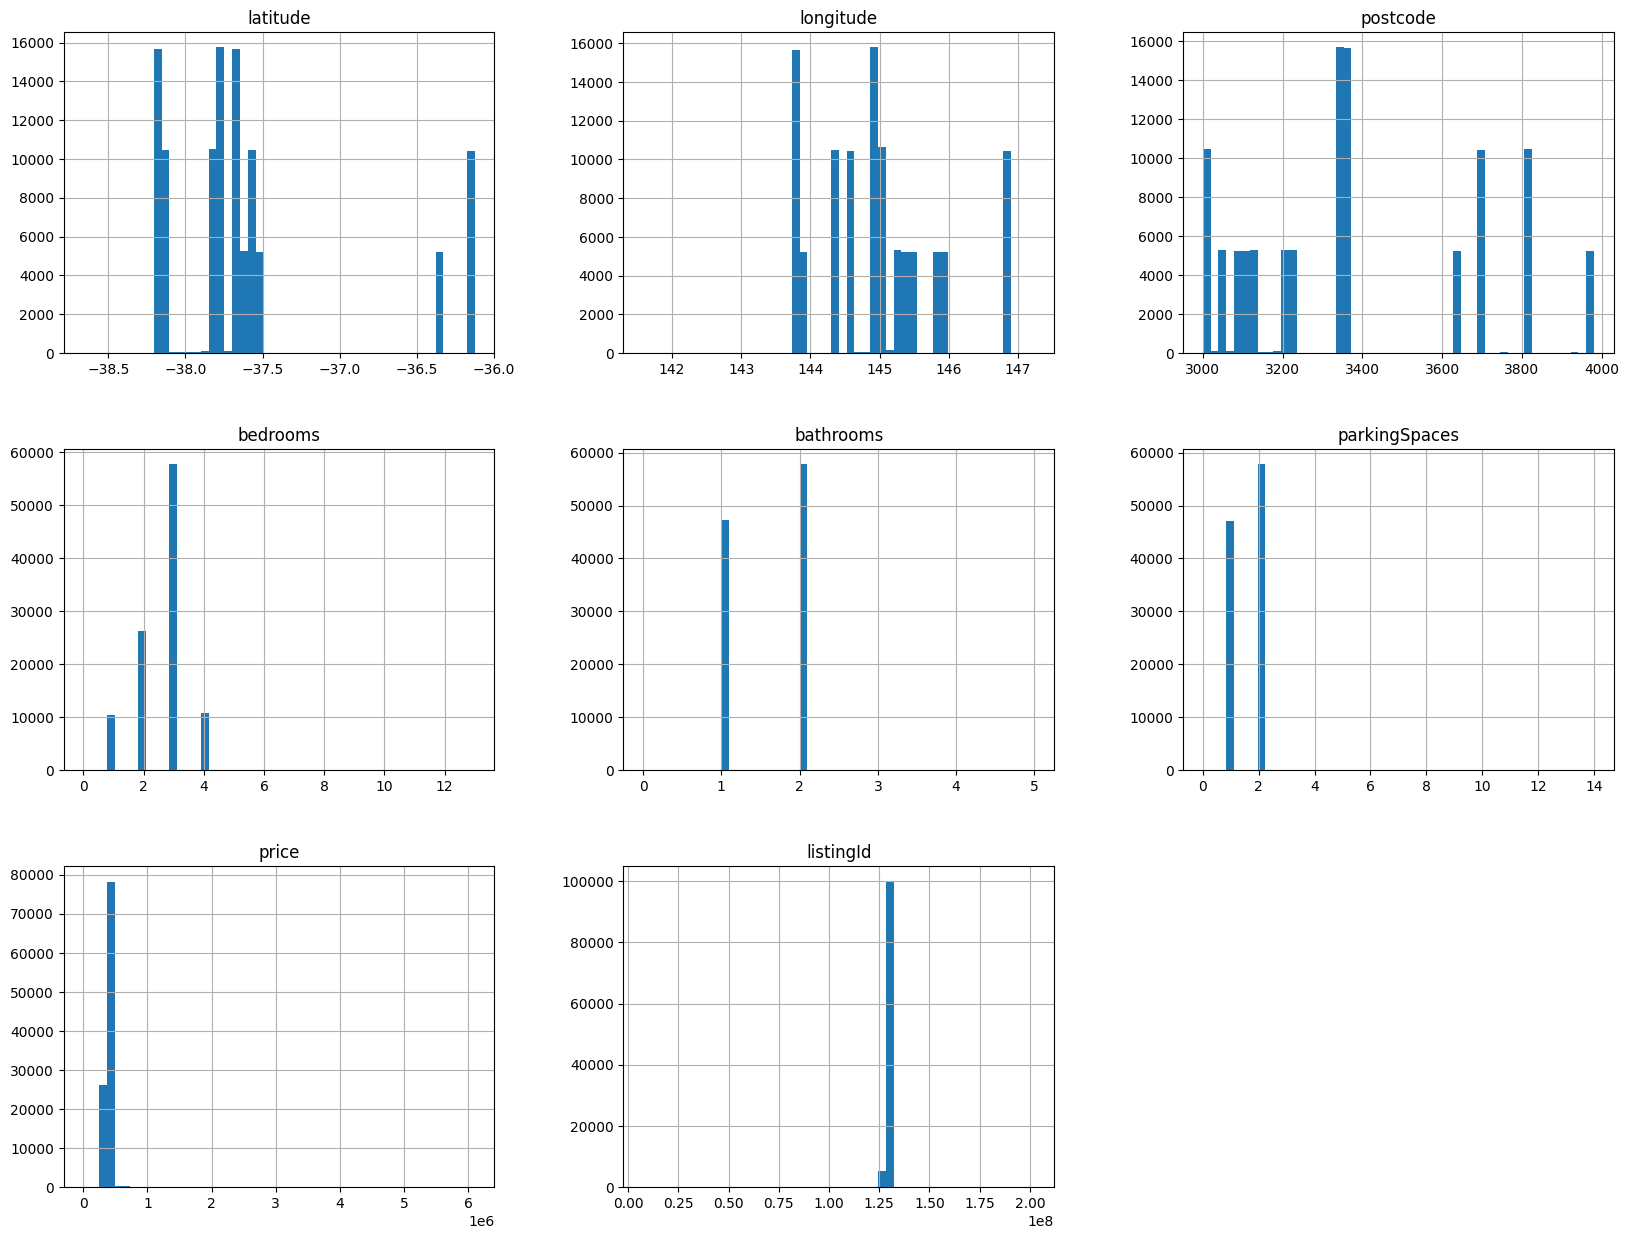

In [4]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
housing['postcode_cat'] = pd.cut(housing['postcode'],
                               bins=[3000,3100,3200,3300,3400,3500,3600,3700,3800,3900, np.inf],
                                 labels=[30,31,32,33,34,35,36,37,38,39])
housing['postcode_cat'].value_counts()

,count
postcode_cat,
33,31294
30,21154
36,15627
31,10706
32,10531
38,10476
39,5256
37,33
34,21


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# # Drop rows with NaN in 'postcode_cat' before splitting
# # removing 2 records which post code is not in the range of 3000-4000
housing = housing.dropna(subset=["postcode_cat"]).reset_index(drop=True)

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# strat_split=[]
# for train_index, test_index in splitter.split(housing_cleaned, housing_cleaned["postcode_cat"]):
#     strat_train_set_n = housing_cleaned.loc[train_index]
#     strat_test_set_n = housing_cleaned.loc[test_index]
#     # Append both train and test sets as a tuple for each split
#     strat_split.append((strat_train_set_n, strat_test_set_n))


# display(housing_cleaned.info())
# display(housing.info())
# # Use the first split for further analysis
# strat_train_set, strat_test_set = strat_split[0]
# print("train set", len(strat_train_set))
# print("test set", len(strat_test_set))
# strat_train_set.head()


from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2,  stratify=housing["postcode_cat"],random_state=42)

print("train set : ",len(train_set))
print("test set  : ",len(test_set))
test_set.head()

train set :  84094
test set  :  21024


,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,postcode_cat
5968,-37.824971,144.962296,65/183 City Road,Southbank,3006,melbourne_city___greater_region,1,1,1,apartment,440000.0,128167750,Southbank Certainty with Oversized Outdoor Ter...,2018-10-26,2018-11-02T14:03:39Z,30
62789,-38.172787,144.331073,1/48 South Street,Belmont,3216,bellarine_peninsula,2,1,1,unit,432500.0,129291430,Impressive townhouse in river precinct,2018-10-26,2018-10-27T02:00:14Z,32
29519,-37.795230,145.024272,143 Wiltshire Drive,Kew,3101,inner_east_melbourne,2,1,1,apartment,470000.0,129466798,"PREMIER LOCATION, WITHIN EXCLUSIVE WILLSMERE E...",2018-10-26,2018-11-01T13:55:37Z,31
59038,-37.799205,145.285383,15/300-308 Mount Dandenong Road,Croydon,3136,eastern_melbourne,3,1,1,unit,471000.0,129079746,A perfect first home package... Owner says sell,2018-10-26,2018-11-02T02:00:20Z,31
32954,-37.805097,144.957514,203/24 Cobden Street,North Melbourne,3051,melbourne_city___greater_region,1,1,1,apartment,355000.0,129545546,Exclusive lifestyle and location,2018-10-26,2018-11-01T02:00:26Z,30


In [7]:
# rekove the postcode_cat category

for set_ in (train_set, test_set):
    set_.drop("postcode_cat", axis=1, inplace=True)

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84094 entries, 3668 to 20155
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       84093 non-null  float64
 1   longitude      84093 non-null  float64
 2   streetAddress  84094 non-null  object 
 3   suburb         84094 non-null  object 
 4   postcode       84094 non-null  int64  
 5   region         79907 non-null  object 
 6   bedrooms       84094 non-null  int64  
 7   bathrooms      84094 non-null  int64  
 8   parkingSpaces  84094 non-null  int64  
 9   propertyType   84094 non-null  object 
 10  price          84094 non-null  float64
 11  listingId      84094 non-null  int64  
 12  title          84094 non-null  object 
 13  dateSold       84094 non-null  object 
 14  modifiedDate   84094 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 10.3+ MB


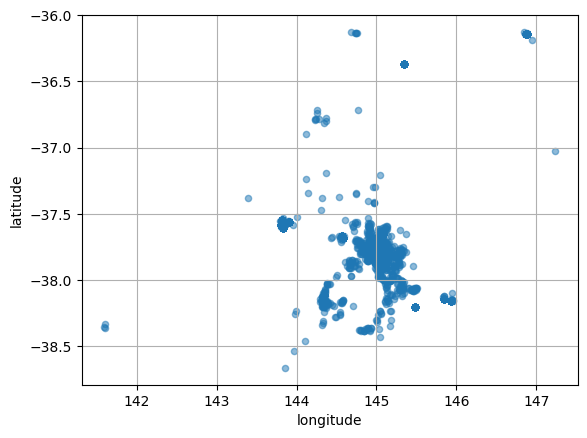

In [8]:
housing = train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, grid=True)
plt.show()

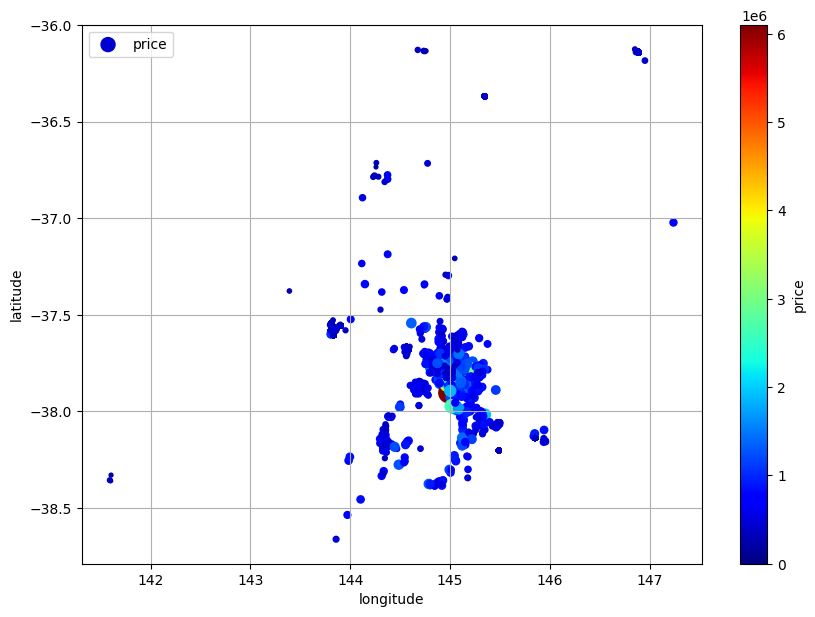

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["price"]/30000, label="price",
             c="price", cmap="jet", colorbar=True,
             legend=True,sharex=False, figsize=(10,7)
             )
plt.show()

In [10]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)


,price
price,1.000000
bathrooms,0.100564
bedrooms,0.032165
parkingSpaces,0.029333
longitude,-0.035138
listingId,-0.070204
latitude,-0.096687
postcode,-0.309144


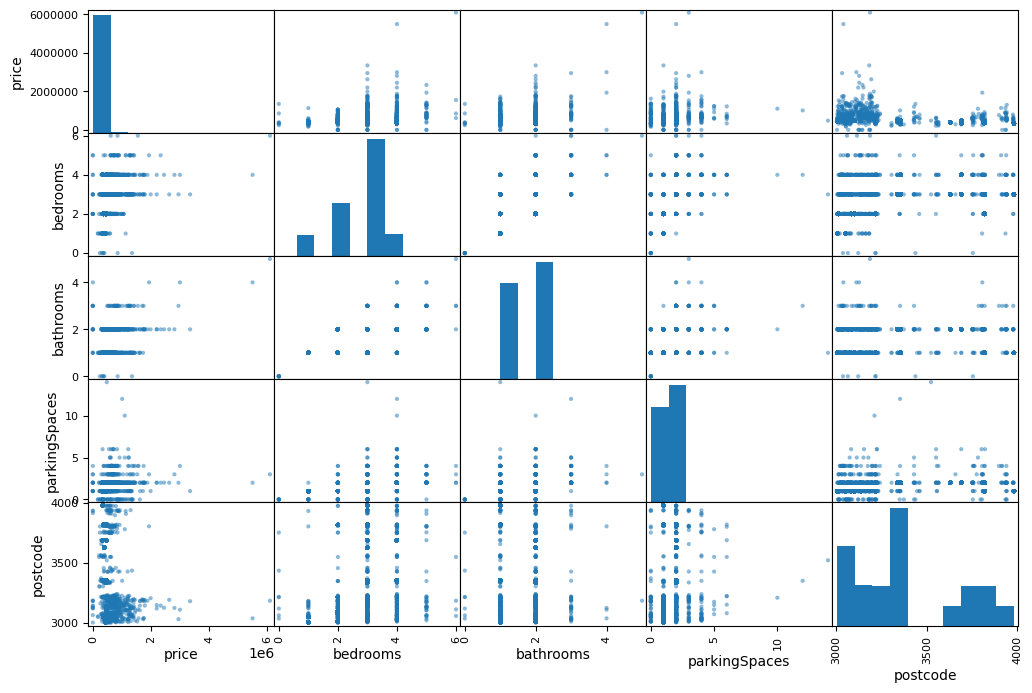

In [11]:
from pandas.plotting import scatter_matrix
attributes = ['price','bedrooms', 'bathrooms', 'parkingSpaces', 'propertyType', 'postcode']

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [12]:
train_set['region'].fillna('Unknown', inplace=True)
train_set['propertyType'].fillna('Unknown', inplace=True)
train_set.dropna(subset=['latitude'], inplace=True)
train_set.dropna(subset=['longitude'], inplace=True)
train_set['bathrooms'].fillna(0, inplace=True)
train_set['parkingSpaces'].fillna(0, inplace=True)



housing = train_set.drop("price", axis=1)
housing_labels = train_set["price"].copy()
housing.head(20)

/tmp/ipython-input-1088057966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['region'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1088057966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,listingId,title,dateSold,modifiedDate
3668,-37.824971,144.962296,65/183 City Road,Southbank,3006,melbourne_city___greater_region,1,1,1,apartment,128167750,Southbank Certainty with Oversized Outdoor Ter...,2018-10-26,2018-11-02T14:03:39Z
103884,-37.678297,144.584048,4 Hudson Place,Melton,3337,western_region,3,2,2,house,129397246,DECEPTIVELY DIFFERENT - 3 BEDROOM PLUS BUNGALOW,2018-10-26,2018-10-30T02:00:25Z
85377,-37.605861,143.834587,154 Morgan Street,Sebastopol,3356,western_region,3,2,2,house,129621538,Well Maintained Brick Beauty,2018-10-26,2018-11-01T13:56:30Z
29774,-37.805097,144.957514,203/24 Cobden Street,North Melbourne,3051,melbourne_city___greater_region,1,1,1,apartment,129545546,Exclusive lifestyle and location,2018-10-26,2018-11-01T02:00:26Z
73391,-36.369752,145.347311,22 Paisley Crescent,Mooroopna,3629,north_east_region,3,2,2,house,129307042,Stylish Living With Bush Outlook,2018-10-26,2018-10-27T14:07:40Z
47655,-36.138885,146.871923,2 Bourke Crescent,Wodonga,3690,north_east_region,4,2,2,house,129326514,Great location a Must ?,2018-10-26,2018-10-29T13:58:43Z
51119,-37.795230,145.024272,143 Wiltshire Drive,Kew,3101,inner_east_melbourne,2,1,1,apartment,129466798,"PREMIER LOCATION, WITHIN EXCLUSIVE WILLSMERE E...",2018-10-26,2018-11-01T13:55:37Z
59149,-38.172787,144.331073,1/48 South Street,Belmont,3216,bellarine_peninsula,2,1,1,unit,129291430,Impressive townhouse in river precinct,2018-10-26,2018-10-27T02:00:14Z
90669,-38.172787,144.331073,1/48 South Street,Belmont,3216,bellarine_peninsula,2,1,1,unit,129291430,Impressive townhouse in river precinct,2018-10-26,2018-10-27T02:00:14Z
968,-37.861506,145.004022,2/106 Alexandra Street,St Kilda East,3183,inner_east_melbourne,2,1,1,apartment,129461626,Newly Renovated with generous al fresco living...,2018-10-26,2018-10-31T13:55:38Z


In [13]:
display(housing.info())

housing['region'].fillna('Unknown', inplace=True)
housing['propertyType'].fillna('Unknown', inplace=True)
housing.dropna(subset=['latitude'], inplace=True)
housing.dropna(subset=['longitude'], inplace=True)
housing['bathrooms'].fillna(0, inplace=True)
housing['parkingSpaces'].fillna(0, inplace=True)

display(housing.info())

<class 'pandas.core.frame.DataFrame'>
Index: 84093 entries, 3668 to 20155
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       84093 non-null  float64
 1   longitude      84093 non-null  float64
 2   streetAddress  84093 non-null  object 
 3   suburb         84093 non-null  object 
 4   postcode       84093 non-null  int64  
 5   region         84093 non-null  object 
 6   bedrooms       84093 non-null  int64  
 7   bathrooms      84093 non-null  int64  
 8   parkingSpaces  84093 non-null  int64  
 9   propertyType   84093 non-null  object 
 10  listingId      84093 non-null  int64  
 11  title          84093 non-null  object 
 12  dateSold       84093 non-null  object 
 13  modifiedDate   84093 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 11.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 84093 entries, 3668 to 20155
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       84093 non-null  float64
 1   longitude      84093 non-null  float64
 2   streetAddress  84093 non-null  object 
 3   suburb         84093 non-null  object 
 4   postcode       84093 non-null  int64  
 5   region         84093 non-null  object 
 6   bedrooms       84093 non-null  int64  
 7   bathrooms      84093 non-null  int64  
 8   parkingSpaces  84093 non-null  int64  
 9   propertyType   84093 non-null  object 
 10  listingId      84093 non-null  int64  
 11  title          84093 non-null  object 
 12  dateSold       84093 non-null  object 
 13  modifiedDate   84093 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 11.6+ MB


/tmp/ipython-input-2676834166.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['region'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2676834166.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

None

In [14]:
from sklearn.preprocessing import OneHotEncoder

suburbencoder = OneHotEncoder(sparse_output=False)
suburb_encoded = suburbencoder.fit_transform(housing[['suburb']])
display(suburb_encoded)


regionencoder = OneHotEncoder(sparse_output=False)
region_encoded = regionencoder.fit_transform(housing[['region']])
display(region_encoded)

propertyTypeEncoder = OneHotEncoder(sparse_output=False)
propertyType_encoded = propertyTypeEncoder.fit_transform(housing[['propertyType']])
display(propertyType_encoded)

display(regionencoder.categories_)
display(suburbencoder.categories_)
display(propertyTypeEncoder.categories_)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[array(['Unknown', 'bayside', 'bellarine_peninsula', 'eastern_melbourne',
        'gippsland', 'inner_east_melbourne', 'melbourne___northern_region',
        'melbourne_city___greater_region', 'mornington_peninsula',
        'north_east_region', 'north_west_melbourne', 'northern_region',
        'south_east_melbourne', 'south_west_melbourne',
        'south_western_region', 'western_melbourne', 'western_region'],
       dtype=object)]

[array(['Abbotsford', 'Aireys Inlet', 'Airport West', 'Albion',
        'Alfredton', 'Alphington', 'Altona Meadows', 'Altona North',
        'Ardeer', 'Armstrong Creek', 'Ascot Vale', 'Ashwood', 'Aspendale',
        'Aspendale Gardens', 'Avondale Heights', 'Bacchus Marsh',
        'Ballarat Central', 'Balwyn North', 'Baranduda', 'Barwon Heads',
        'Bayswater', 'Bayswater North', 'Beaumaris', 'Bell Park',
        'Bell Post Hill', 'Belmont', 'Bentleigh East', 'Berwick',
        'Bittern', 'Black Rock', 'Blackburn', 'Blackburn South',
        'Blackwood', 'Bonbeach', 'Bonshaw', 'Boronia', 'Box Hill',
        'Box Hill South', 'Braybrook', 'Brighton', 'Brighton East',
        'Broadford', 'Brookfield', 'Brown Hill', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bullarook', 'Buln Buln',
        'Bundoora', 'Burnside', 'Burnside Heights', 'Burwood',
        'Camberwell', 'Campbellfield', 'Canterbury', 'Capel Sound',
        'Carlton', 'Carlton North', 'Carnegie', 'Caroline 

[array(['acreage/semi-rural', 'alpine', 'apartment', 'house', 'other',
        'residential land', 'townhouse', 'unit', 'villa'], dtype=object)]

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas

housing_num = housing.select_dtypes(include=[np.number])
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
housing_num_tr = num_pipeline.fit_transform(housing_num)

# Convert the NumPy array to a pandas DataFrame
housing_num_tr_df = pd.DataFrame(housing_num_tr, columns=housing_num.columns)

# Display the head of the DataFrame
display(housing_num_tr_df.head())

,latitude,longitude,postcode,bedrooms,bathrooms,parkingSpaces,listingId
0,-0.386221,-0.026951,-1.279396,-2.082958,-1.103956,-1.084738,-1.532599
1,-0.146732,-0.454195,-0.134349,0.433957,0.900037,0.876832,0.103683
2,-0.028458,-1.300735,-0.068621,0.433957,0.900037,0.876832,0.402183
3,-0.353770,-0.032353,-1.123725,-2.082958,-1.103956,-1.084738,0.301049
4,1.989858,0.407936,0.875783,0.433957,0.900037,0.876832,-0.016365


,num__longitude,num__latitude,num__bedrooms,num__bathrooms,num__parkingSpaces,num__postcode,num__listingId,cat__propertyType_acreage/semi-rural,cat__propertyType_alpine,cat__propertyType_apartment,cat__propertyType_house,cat__propertyType_other,cat__propertyType_residential land,cat__propertyType_townhouse,cat__propertyType_unit,cat__propertyType_villa
3668,-0.026951,-0.386221,-2.082958,-1.103956,-1.084738,-1.279396,-1.532599,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103884,-0.454195,-0.146732,0.433957,0.900037,0.876832,-0.134349,0.103683,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85377,-1.300735,-0.028458,0.433957,0.900037,0.876832,-0.068621,0.402183,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29774,-0.032353,-0.353770,-2.082958,-1.103956,-1.084738,-1.123725,0.301049,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73391,0.407936,1.989858,0.433957,0.900037,0.876832,0.875783,-0.016365,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


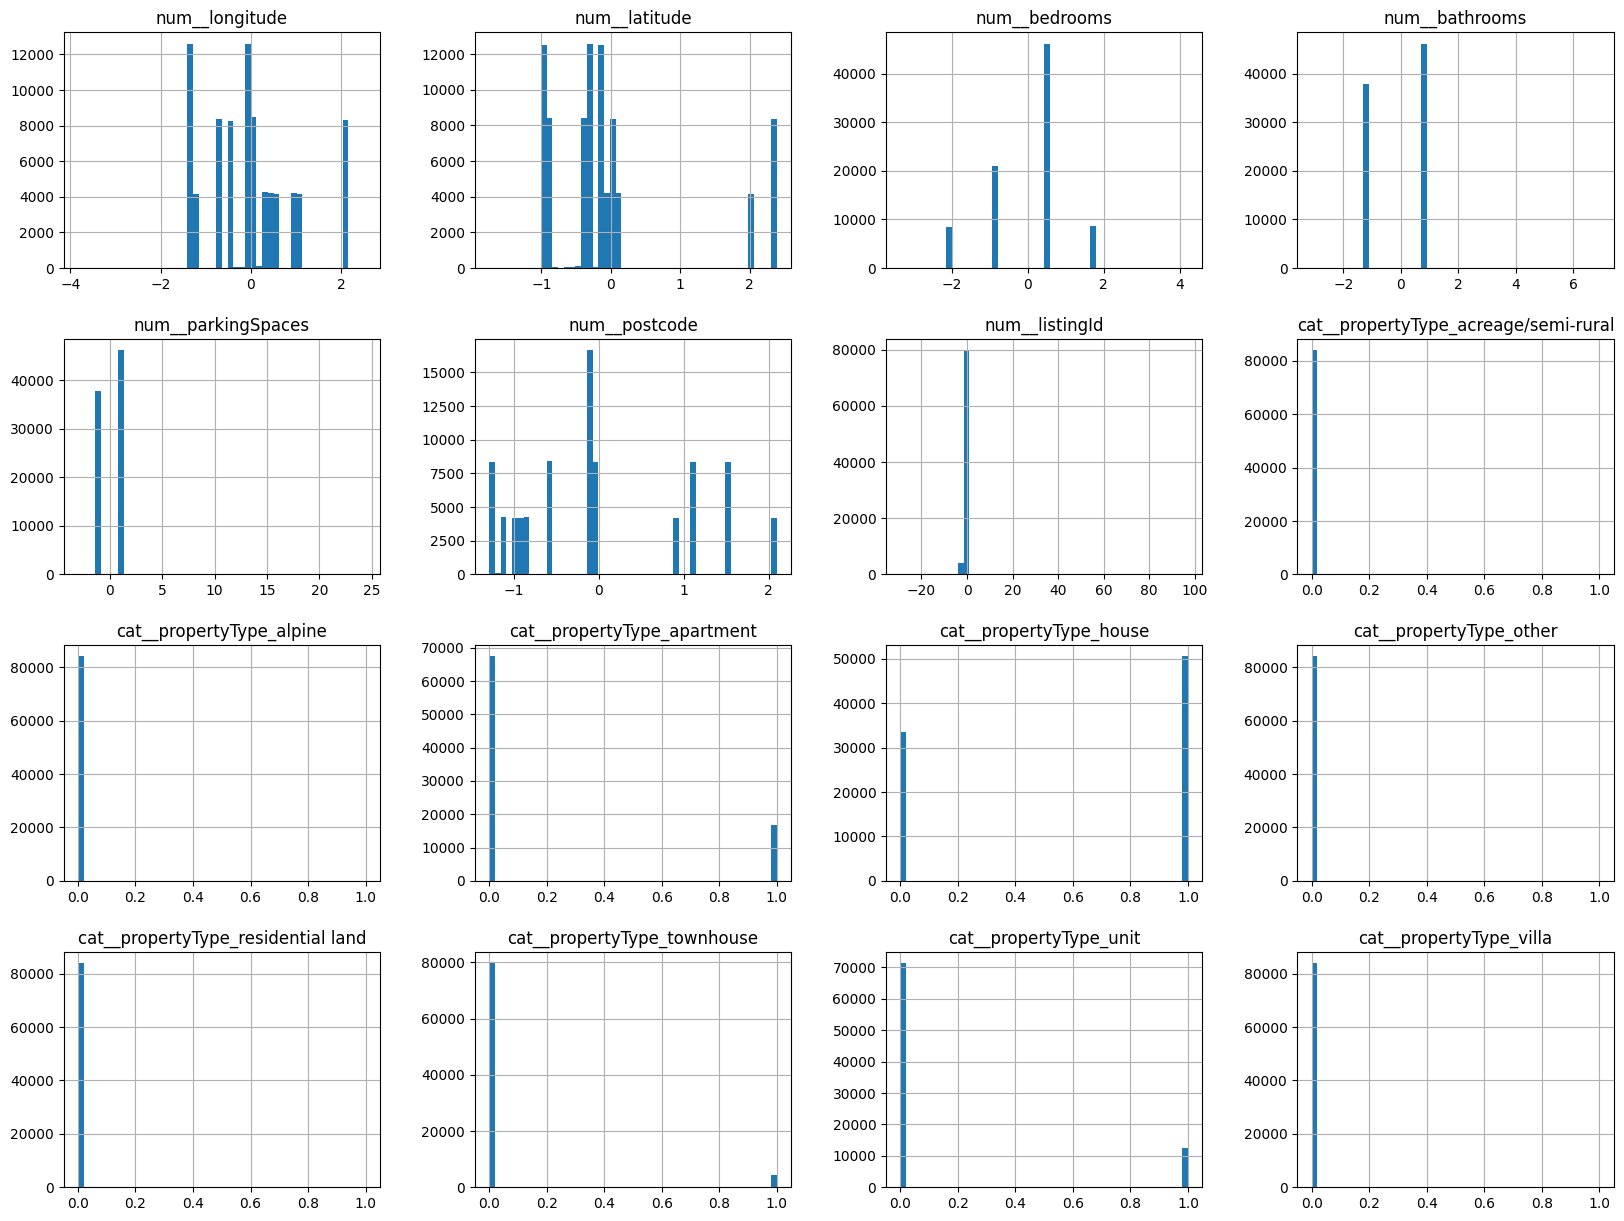

In [16]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define the numerical and categorical attributes
num_attribs = ["longitude", "latitude", "bedrooms", "bathrooms", "parkingSpaces", "postcode", "listingId"]
cat_attribs = ["propertyType"] # Re-introduced categorical attributes

# Define the numerical pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# Define the categorical pipeline
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Create the ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs), # Re-introduced categorical attributes
])

# Apply the preprocessing to the housing data
house_prepared = preprocessing.fit_transform(housing) # Apply to the full housing data

# Convert the processed data back to a DataFrame
house_prepared

scaled_data_df = pd.DataFrame(house_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)

# Display the head of the processed DataFrame
display(scaled_data_df.head())

# Plot histograms
import matplotlib.pyplot as plt
scaled_data_df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=13, gamma=1.0 ,random_state=42):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
      self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
      self.kmeans_.fit(X, sample_weight=sample_weight)
      return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

,num__longitude,num__latitude,num__bedrooms,num__bathrooms,num__parkingSpaces,num__postcode,num__listingId,geo__Cluster 0 similarity,geo__Cluster 1 similarity,geo__Cluster 2 similarity,...,reg__region_melbourne_city___greater_region,reg__region_mornington_peninsula,reg__region_north_east_region,reg__region_north_west_melbourne,reg__region_northern_region,reg__region_south_east_melbourne,reg__region_south_west_melbourne,reg__region_south_western_region,reg__region_western_melbourne,reg__region_western_region
3668,-0.026951,-0.386221,-2.082958,-1.103956,-1.084738,-1.279396,-1.532599,0.103737,0.848244,0.411457,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103884,-0.454195,-0.146732,0.433957,0.900037,0.876832,-0.134349,0.103683,0.100775,1.000000,0.162533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85377,-1.300735,-0.028458,0.433957,0.900037,0.876832,-0.068621,0.402183,0.022009,0.567264,0.012910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29774,-0.032353,-0.353770,-2.082958,-1.103956,-1.084738,-1.123725,0.301049,0.109464,0.855938,0.402763,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73391,0.407936,1.989858,0.433957,0.900037,0.876832,0.875783,-0.016365,1.000000,0.100772,0.034044,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47655,2.130035,2.366817,1.692415,0.900037,0.876832,1.086803,0.009549,0.092760,0.000498,0.006488,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51119,0.043053,-0.337660,-0.824501,-1.103956,-1.084738,-0.950757,0.196247,0.118086,0.812635,0.448788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59149,-0.739938,-0.954134,-0.824501,-1.103956,-1.084738,-0.552931,-0.037143,0.013792,0.734546,0.099061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90669,-0.739938,-0.954134,-0.824501,-1.103956,-1.084738,-0.552931,-0.037143,0.013792,0.734546,0.099061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,0.020180,-0.445875,-0.824501,-1.103956,-1.084738,-0.667090,0.189364,0.096022,0.810629,0.451995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


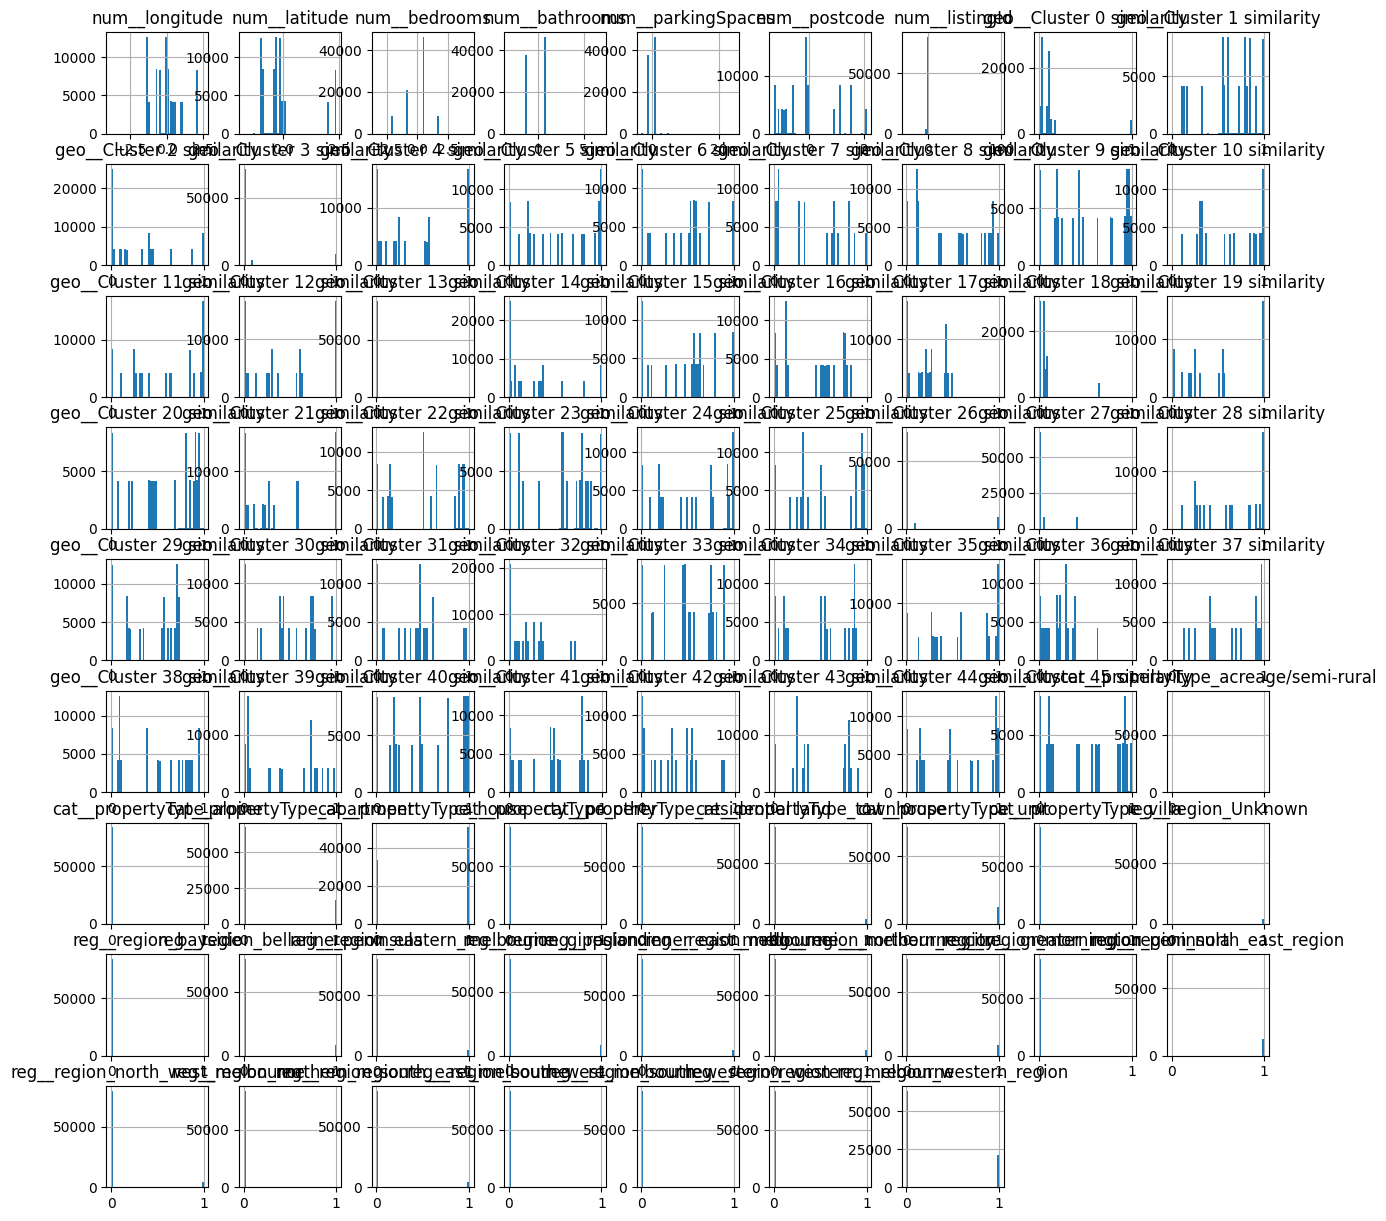

In [18]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

num_attribs = ["longitude", "latitude", "bedrooms", "bathrooms", "parkingSpaces", "postcode", "listingId"]
cat_attribs = ["propertyType"] # Re-introduced categorical attributes

def column_ratio(X):
  return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"), FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=46, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("geo", cluster_simil, ["latitude","longitude"]),
    ("cat",cat_pipeline, ["propertyType"]),
    # ("sub", cat_pipeline,["suburb"]),
    ("reg", cat_pipeline,["region"])
    # ("cat",cat_pipeline, make_column_selector(dtype_include=object)),
])


housing_prepared = preprocessing.fit_transform(housing)

housing_prepared.shape


#v scaled_data_df = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
scaled_data_df = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
display(scaled_data_df.head(20))

import matplotlib.pyplot as plt
scaled_data_df.hist(bins=50, figsize=(15,15))
plt.show()

In [19]:
# most basic model as Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

display(len(housing))
display(len(housing_labels))

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

84093

84093

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'bedrooms', 'bathrooms',
                                                   'parkingSpaces', 'postcode',
                                                   'listingId']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=46),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['propertyType']),
                                                 ('reg',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region'])])),
                ('linearregression', LinearRegression())])

In [20]:
housing_predictions = lin_reg.predict(housing)
print(housing_predictions[:10].round(-2))
print(housing_labels.iloc[:10].values)

[437600. 455500. 329000. 358000. 388000. 345200. 470100. 430900. 430900.
 681800.]
[440000. 455000. 330000. 355000. 388000. 345000. 470000. 432500. 432500.
 515111.]


In [21]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(33033.278324784165)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


tree_rmses = cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
print(np.sqrt(-tree_rmses))

pd.Series(tree_rmses).describe()

[161.88433358 184.02264078 178.37542721 197.35763241 212.81346452
 207.198615   237.84161948 225.81193324 166.07226266 181.26179662]


,0
count,10.000000
mean,-38705.503511
std,10090.642407
min,-56568.635959
25%,-44699.994524
50%,-36407.183696
75%,-32077.304502
max,-26206.537457


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor


full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42, max_features=9))
])


param_distribs = {"preprocessing__geo__n_clusters": randint(low=3, high=50),
                   "random_forest__max_features": randint(low=2, high=11)}
rnd_search=RandomizedSearchCV(full_pipeline,param_distributions=param_distribs,n_iter=8,cv=3,scoring="neg_root_mean_squared_error",verbose=2,random_state=42)
rnd_search.fit(housing, housing_labels)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END preprocessing__geo__n_clusters=41, random_forest__max_features=5; total time=   3.0s


In [ ]:
final_model = rnd_search.best_estimator_
feature_importance= final_model["random_forest"].feature_importances_

sorted(zip(feature_importance, final_model["preprocessing"].get_feature_names_out()), reverse=True)



In [ ]:

display(rnd_search.best_params_)

In [ ]:
rnd_res = pd.DataFrame(rnd_search.cv_results_)
rnd_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(rnd_res)

In [ ]:
from sklearn.metrics import root_mean_squared_error
test_set.head()

X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

final_prediction = final_model.predict(X_test)
# final_mse = mean_squared_error(y_test, final_prediction)
# final_rmse = np.sqrt(final_mse)
# final_rmse

final_rmse = root_mean_squared_error(y_test, final_prediction)
print(final_rmse)

In [ ]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [ ]:
import joblib

joblib.dump(final_model, "my_vic_housing_model.pkl")

In [ ]:


import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_vic_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)